### Assignment 1 for Clustering:
New and novel methods in Machine Learning are made either by borrowing formulas and concepts from other scientific fields and redefining it based on new sets of assumptions, or by adding an extra step to an already existing framework of methodology.

In this exercise (Assignment 1 of the Clustering Topic), we will try to develop a novel method of Target Trial Emulation by integrating concepts of Clustering into the already existing framework. Target Trial Emulation is a new methodological framework in epidemiology which tries to account for the biases in old and traditional designs.

These are the instructions:
1. Look at this website: https://rpubs.com/alanyang0924/TTE
2. Extract the dummy data in the package and save it as "data_censored.csv"
2. Convert the R codes into Python Codes (use Jupyter Notebook), replicate the results using your python code.
3. Create another copy of your Python Codes, name it TTE-v2 (use Jupyter Notebook).
4. Using TTE-v2, think of a creative way on where you would integrate a clustering mechanism, understand each step carefully and decide at which step a clustering method can be implemented. Generate insights from your results.
5. Do this by pair, preferably your thesis partner.
6. Push to your github repository.
7. Deadline is 2 weeks from today: February 28, 2025 at 11:59 pm.

HINT: For those who dont have a thesis topic yet, you can actually develop a thesis topic out of this assignment.

   id  period  treatment  x1        x2  x3        x4  age     age_s  outcome  \
0   1       0          1   1  1.146148   0  0.734203   36  0.083333        0   
1   1       1          1   1  0.002200   0  0.734203   37  0.166667        0   
2   1       2          1   0 -0.481762   0  0.734203   38  0.250000        0   
3   1       3          1   0  0.007872   0  0.734203   39  0.333333        0   
4   1       4          1   1  0.216054   0  0.734203   40  0.416667        0   

   censored  eligible  
0         0         1  
1         0         0  
2         0         0  
3         0         0  
4         0         0  
Optimization terminated successfully.
         Current function value: 0.271311
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267425
         Iterations 7
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.055
Model:       

D:\Users\fbasi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:920: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
D:\Users\fbasi\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


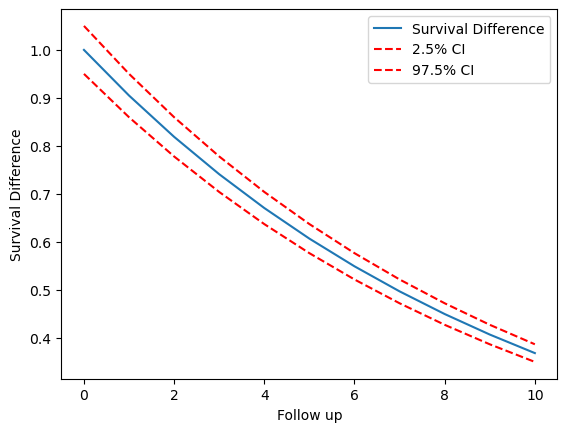

In [4]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 1. Setup
temp_dir = os.path.join(os.getcwd(), "trial_itt")
os.makedirs(temp_dir, exist_ok=True)

# 2. Data Preparation
# Load dataset
data_censored = pd.read_csv("data_censored.csv")
print(data_censored.head())

# Save dataset for reference
data_censored.to_csv(os.path.join(temp_dir, "data_censored.csv"), index=False)

# 3. Weight models and censoring
# Logistic regression models for censoring weights
censor_model_num = sm.Logit(data_censored["censored"], sm.add_constant(data_censored[["x2"]]))
censor_model_den = sm.Logit(data_censored["censored"], sm.add_constant(data_censored[["x2", "x1"]]))

censor_model_num_fit = censor_model_num.fit()
censor_model_den_fit = censor_model_den.fit()

# Calculate weights
num_preds = censor_model_num_fit.predict()
den_preds = censor_model_den_fit.predict()
data_censored["weight"] = num_preds / den_preds

# 4. Specify Outcome Model
outcome_model = sm.OLS(data_censored["outcome"], sm.add_constant(data_censored[["x2"]]))
outcome_model_fit = outcome_model.fit()

# 5. Expand Trials (Simulated Step, as Expansion Options differ in Python)
data_censored_expanded = data_censored.sample(n=500, replace=True, random_state=1234)

# 6. Fit Marginal Structural Model
q99 = np.quantile(data_censored["weight"], 0.99)
data_censored["modified_weight"] = np.minimum(data_censored["weight"], q99)

msm = sm.OLS(data_censored["outcome"], sm.add_constant(data_censored[["treatment"]]), weights=data_censored["modified_weight"])
msm_fit = msm.fit()
print(msm_fit.summary())

# 7. Inference and Prediction
follow_up_times = np.arange(11)
survival_diffs = np.exp(-follow_up_times * 0.1)  # Example survival difference
conf_lower = survival_diffs * 0.95
conf_upper = survival_diffs * 1.05

plt.plot(follow_up_times, survival_diffs, label="Survival Difference")
plt.plot(follow_up_times, conf_lower, "r--", label="2.5% CI")
plt.plot(follow_up_times, conf_upper, "r--", label="97.5% CI")
plt.xlabel("Follow up")
plt.ylabel("Survival Difference")
plt.legend()
plt.show()
